In [4]:
import torch 
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [7]:
# prepare data
x_numpy , y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise= 20, random_state=1)

In [9]:
x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
#flatten
y = y.view(y.shape[0],1)

n_samples, n_features = x.shape

In [10]:
# Create model,
input_size = n_features
output_size = 1
model =nn.Linear(input_size, output_size)

In [13]:
# Loss and Optimizer 
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate )

In [14]:
# Training Loop 
num_epoch = 100
for epoch in range(num_epoch):
    # forward pass and loss
    y_pred = model(x)
    loss = criterion(y_pred, y)
    # bacward pass
    loss.backward()
    # update
    optimizer.step()
    
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 4403.1758
epoch: 20, loss = 3284.1001
epoch: 30, loss = 2474.6233
epoch: 40, loss = 1888.4556
epoch: 50, loss = 1463.5648
epoch: 60, loss = 1155.2906
epoch: 70, loss = 931.4334
epoch: 80, loss = 768.7476
epoch: 90, loss = 650.4308
epoch: 100, loss = 564.3250


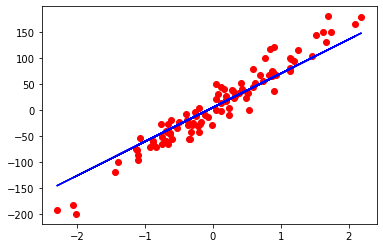

In [15]:
predcited = model(x).detach().numpy()
plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predcited, 'b')
plt.show()
